In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training and testing datasets from the provided file contents
train_df = pd.read_csv("C:\\Users\\Harshit\\Downloads\\Code Craft Data Science Internship\\titanic\\train.csv")
test_df = pd.read_csv("C:\\Users\\Harshit\\Downloads\\Code Craft Data Science Internship\\titanic\\test.csv")
gender_submission_df = pd.read_csv("C:\\Users\\Harshit\\Downloads\\Code Craft Data Science Internship\\titanic\\gender_submission.csv")


# Combine train_df and test_df for preprocessing (without 'Survived' column)
combined_df = pd.concat([train_df.drop('Survived', axis=1), test_df], ignore_index=True)


# Display the first few rows
print("First 5 rows of the training data:")
print(train_df.head())

print("\nFirst 5 rows of the test data:")
print(test_df.head())

print("\nFirst 5 rows of the gender_submission data:")
print(gender_submission_df.head())

# Get a concise summary of the data
print("\nTraining data summary:")
print(train_df.info())

print("\nTesting data summary:")
print(test_df.info())


# Check for missing values
print("\nMissing values in training data:")
print(train_df.isnull().sum())

print("\nMissing values in testing data:")
print(test_df.isnull().sum())


# Descriptive statistics
print("\nDescriptive statistics of training data:")
print(train_df.describe())

print("\nDescriptive statistics of testing data:")
print(test_df.describe())


First 5 rows of the training data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            

In [5]:
# Handle missing Age values (imputation using the median)
median_age = combined_df['Age'].median()
combined_df['Age'] = combined_df['Age'].fillna(median_age)
train_df['Age'] = train_df['Age'].fillna(median_age)
test_df['Age'] = test_df['Age'].fillna(median_age)

# Handle missing Cabin values (imputation with 'Unknown')
combined_df['Cabin'] = combined_df['Cabin'].fillna('Unknown')
train_df['Cabin'] = train_df['Cabin'].fillna('Unknown')
test_df['Cabin'] = test_df['Cabin'].fillna('Unknown')

# Handle missing Embarked values (imputation using the mode)
mode_embarked = combined_df['Embarked'].mode()[0]
combined_df['Embarked'] = combined_df['Embarked'].fillna(mode_embarked)
train_df['Embarked'] = train_df['Embarked'].fillna(mode_embarked)
test_df['Embarked'] = test_df['Embarked'].fillna(mode_embarked)

# Handle missing Fare value in test_df (imputation using the median)
median_fare = combined_df['Fare'].median()
test_df['Fare'] = test_df['Fare'].fillna(median_fare)
combined_df['Fare'] = combined_df['Fare'].fillna(median_fare)

# Correct data types (if needed) - Example:  Making sure Pclass is categorical
train_df['Pclass'] = train_df['Pclass'].astype('category')
test_df['Pclass'] = test_df['Pclass'].astype('category')
combined_df['Pclass'] = combined_df['Pclass'].astype('category')

# Check for duplicates (and remove if found - be cautious!)
print("\nNumber of duplicate rows in training data:", train_df.duplicated().sum())
print("\nNumber of duplicate rows in testing data:", test_df.duplicated().sum())

print("\nMissing values in training data after cleaning:")
print(train_df.isnull().sum()) #recheck missing values in train_df

print("\nMissing values in testing data after cleaning:")
print(test_df.isnull().sum()) #recheck missing values in test_df



Number of duplicate rows in training data: 0

Number of duplicate rows in testing data: 0

Missing values in training data after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Missing values in testing data after cleaning:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Survival Rate:
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


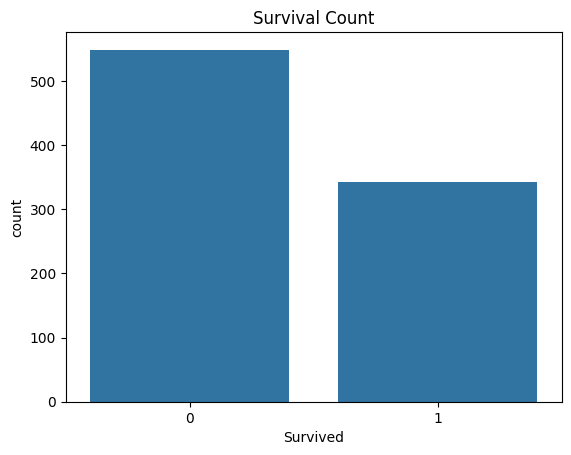


Passenger Class Distribution:
Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64


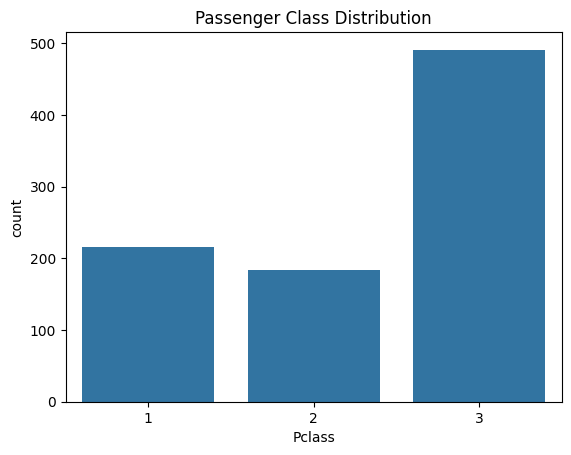


Sex Distribution:
Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64


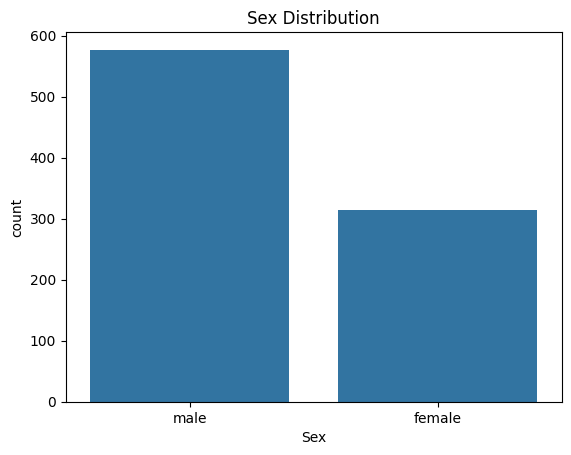

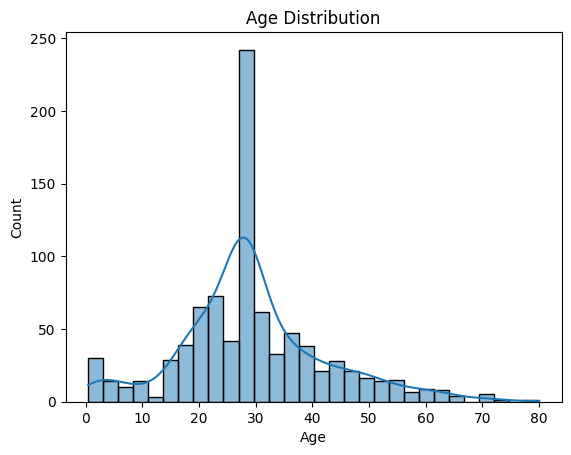

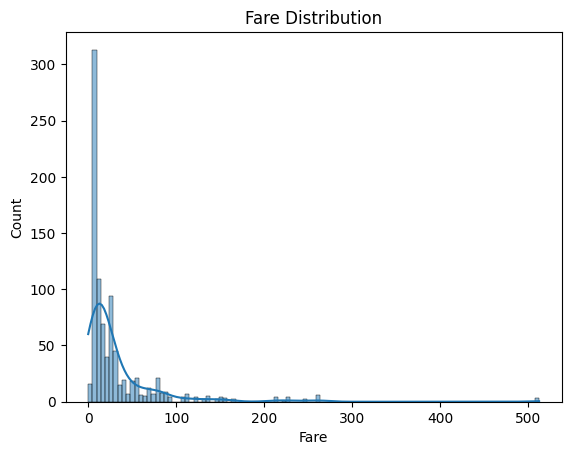

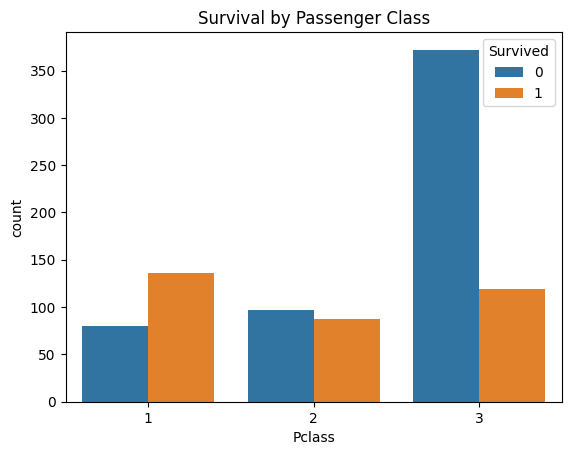

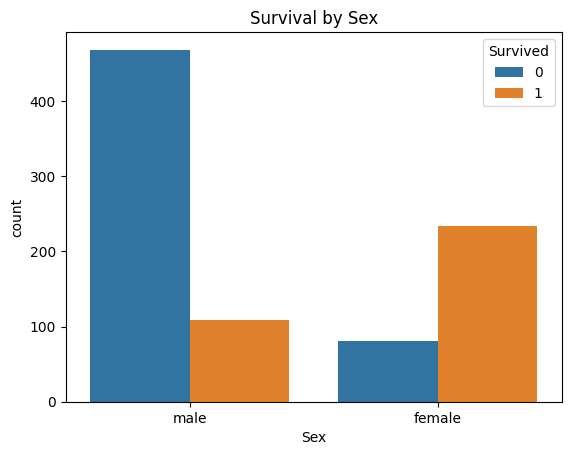

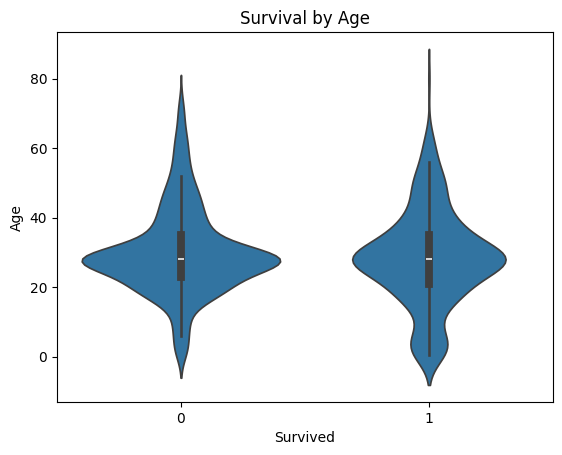

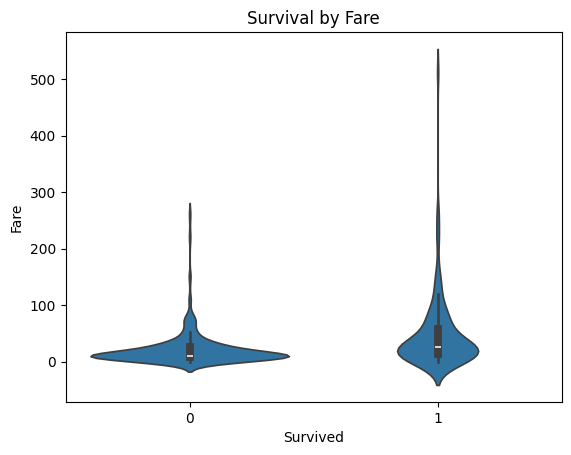

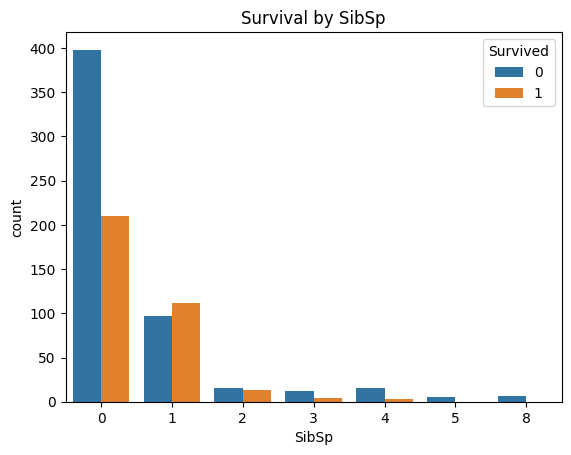

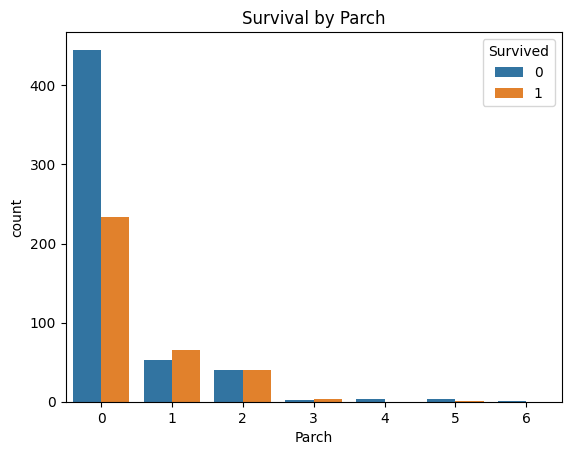

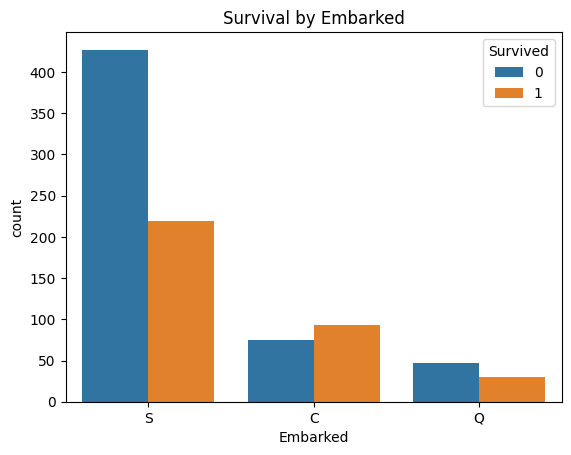

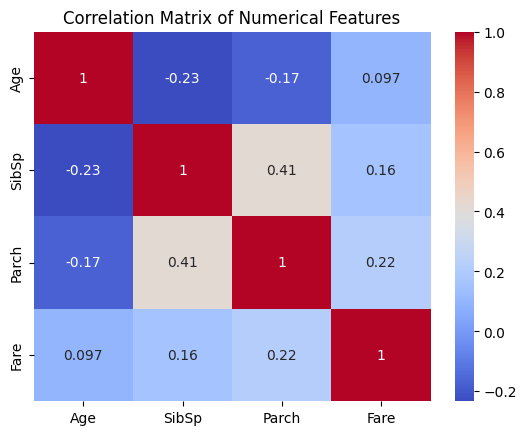

In [6]:
# Univariate Analysis

# Survival Rate
print("Survival Rate:")
print(train_df['Survived'].value_counts(normalize=True))
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()


# Passenger Class
print("\nPassenger Class Distribution:")
print(train_df['Pclass'].value_counts(normalize=True))
sns.countplot(x='Pclass', data=train_df)
plt.title('Passenger Class Distribution')
plt.show()

# Sex
print("\nSex Distribution:")
print(train_df['Sex'].value_counts(normalize=True))
sns.countplot(x='Sex', data=train_df)
plt.title('Sex Distribution')
plt.show()

# Age Distribution
sns.histplot(train_df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Fare Distribution
sns.histplot(train_df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()


# Bivariate Analysis (Survival vs. Other Features)

# Survival vs. Pclass
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival by Passenger Class')
plt.show()

# Survival vs. Sex
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival by Sex')
plt.show()

# Survival vs. Age
sns.violinplot(x='Survived', y='Age', data=train_df)
plt.title('Survival by Age')
plt.show()

# Survival vs. Fare
sns.violinplot(x='Survived', y='Fare', data=train_df)
plt.title('Survival by Fare')
plt.show()

# Survival vs. SibSp
sns.countplot(x='SibSp', hue='Survived', data=train_df)
plt.title('Survival by SibSp')
plt.show()

# Survival vs. Parch
sns.countplot(x='Parch', hue='Survived', data=train_df)
plt.title('Survival by Parch')
plt.show()

# Survival vs Embarked
sns.countplot(x='Embarked', hue='Survived', data=train_df)
plt.title('Survival by Embarked')
plt.show()



# Correlation Analysis (Numerical Features)
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = train_df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

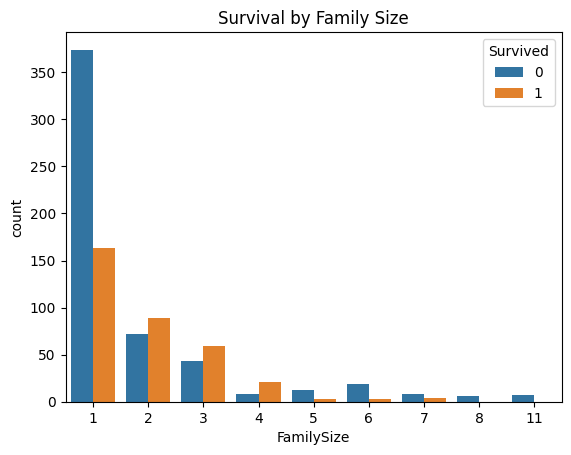

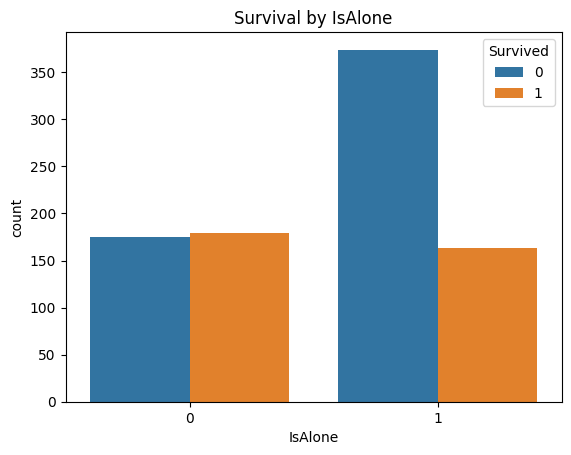

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64


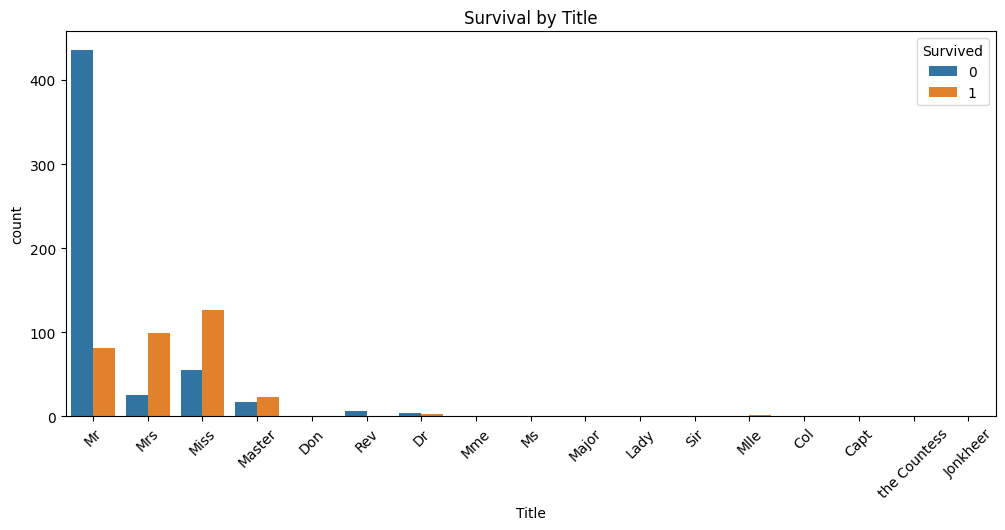

In [7]:
# Example:  Create a 'FamilySize' feature
combined_df['FamilySize'] = combined_df['SibSp'] + combined_df['Parch'] + 1
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# Analyze Survival vs. Family Size
sns.countplot(x='FamilySize', hue='Survived', data=train_df)
plt.title('Survival by Family Size')
plt.show()

# Example: Create an 'IsAlone' feature
combined_df['IsAlone'] = 0
combined_df.loc[combined_df['FamilySize'] == 1, 'IsAlone'] = 1

train_df['IsAlone'] = 0
train_df.loc[train_df['FamilySize'] == 1, 'IsAlone'] = 1

test_df['IsAlone'] = 0
test_df.loc[test_df['FamilySize'] == 1, 'IsAlone'] = 1

# Analyze Survival vs. IsAlone
sns.countplot(x='IsAlone', hue='Survived', data=train_df)
plt.title('Survival by IsAlone')
plt.show()


# Example: Extract title from name

def extract_title(name):
    return name.split(',')[1].split('.')[0].strip()

combined_df['Title'] = combined_df['Name'].apply(extract_title)
train_df['Title'] = train_df['Name'].apply(extract_title)
test_df['Title'] = test_df['Name'].apply(extract_title)

print(train_df['Title'].value_counts())

# Analyze Survival vs. Title
plt.figure(figsize=(12, 5))
sns.countplot(x='Title', hue='Survived', data=train_df)
plt.xticks(rotation=45)
plt.title('Survival by Title')
plt.show()